In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
all_files = os.listdir("./Data/SpotifyData/Stream/")
stream_df = pd.DataFrame()
for file in all_files:
    temp_df = pd.read_json("./Data/SpotifyData/Stream/"+file)
    stream_df = pd.concat([stream_df, temp_df])

In [12]:
#This df contains data from 21-09-2020 onwards
stream_df.to_csv("combined_data.csv", index=False)
df = pd.read_csv("combined_data.csv")

In [34]:
top100 = df.groupby("artistName").sum("msPlayed").sort_values("msPlayed", ascending=False).head(100)


In [42]:
top100['hoursPlayed'] = top100['msPlayed'] / 1000 / 60 / 60
top100['daysPlayed'] = top100['hoursPlayed'] / 24

In [43]:
top100.head(25)

,msPlayed,hoursPlayed,daysPlayed
artistName,,,
Opeth,758492717,210.692421,8.778851
Metallica,66604430,18.501231,0.770885
Porcupine Tree,65850069,18.291686,0.762154
Music Utility,56561984,15.711662,0.654653
The Ocean,51819487,14.394302,0.599763
Anekdoten,48077594,13.354887,0.556454
Gojira,44140944,12.261373,0.510891
Mastodon,37033410,10.287058,0.428627
My Morning Jacket,34215080,9.504189,0.396008


In [25]:
df

,endTime,artistName,trackName,msPlayed,TrackID
0,2020-09-21 16:13,Opeth,Face Of Melinda (Remastered),26247,Opeth:Face Of Melinda (Remastered)
1,2020-09-22 03:12,Jordan Robinson,Black Rapids,85997,Jordan Robinson:Black Rapids
2,2020-09-22 08:09,Haken,Affinity.exe,1496,Haken:Affinity.exe
3,2020-09-22 08:09,Soen,Martyrs,30869,Soen:Martyrs
4,2020-09-22 08:09,TOOL,The Grudge,76927,TOOL:The Grudge
...,...,...,...,...,...
18625,2021-09-22 06:59,Anathema,One Last Goodbye - Remastered,323933,Anathema:One Last Goodbye - Remastered
18626,2021-09-22 07:00,Soen,Martyrs,0,Soen:Martyrs
18627,2021-09-22 07:12,Empyrium,The Ensemble of Silence,595000,Empyrium:The Ensemble of Silence
18628,2021-09-22 07:16,Blackfield,Glow - Remastered,243040,Blackfield:Glow - Remastered


In [16]:
df['TrackID'] = df['artistName'] + ':' + df['trackName']

,msPlayed,hoursPlayed,daysPlayed
artistName,,,
Slugdge,0,0.000000,0.000000
Ramones,0,0.000000,0.000000
The Animals,0,0.000000,0.000000
Two Door Cinema Club,0,0.000000,0.000000
Jack Thammarat,0,0.000000,0.000000
...,...,...,...
The Ocean,51819487,14.394302,0.599763
Music Utility,56561984,15.711662,0.654653
Porcupine Tree,65850069,18.291686,0.762154


In [39]:
# artists = [artist for artist, df in top100.groupby('artistName').sort_values("msPlayed", ascending=False)]

In [57]:
x_axis = top100.index.values
y_axis = top100.head(25)['hoursPlayed']

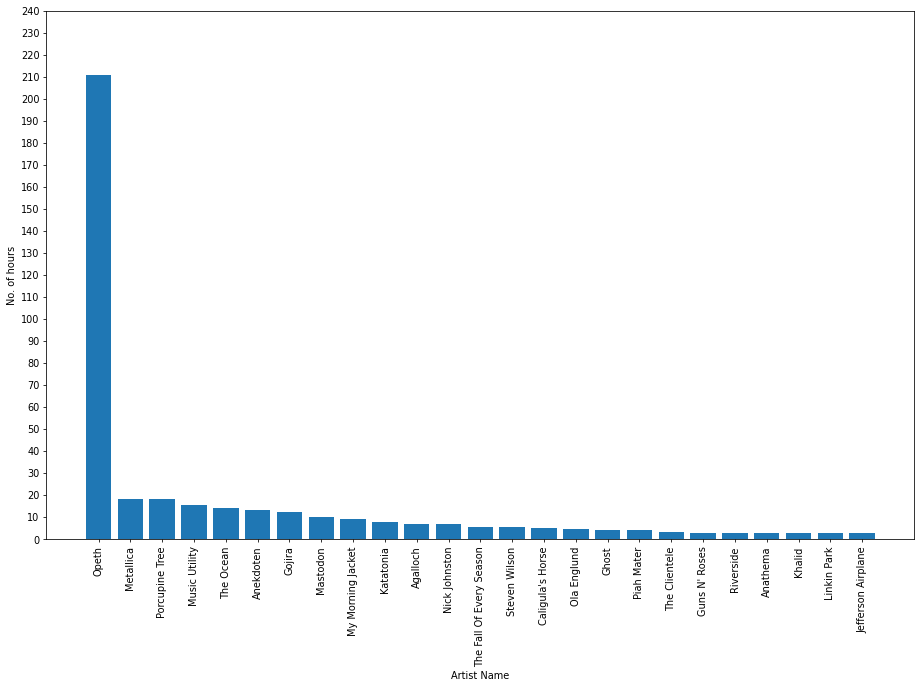

In [64]:
plt.figure(figsize=(16,10), dpi=70)
plt.bar(x_axis[0:25], y_axis)
plt.xlabel("Artist Name")
plt.ylabel("No. of hours")
plt.xticks(rotation="vertical")
plt.yticks(np.arange(0, 250, 10))
plt.savefig("Bar25")
plt.show()

In [104]:
df.count()

,endTime,artistName,trackName,msPlayed,TrackID,endHour
0,2020-09-21 16:13,Opeth,Face Of Melinda (Remastered),26247,Opeth:Face Of Melinda (Remastered),16
1,2020-09-22 03:12,Jordan Robinson,Black Rapids,85997,Jordan Robinson:Black Rapids,03
2,2020-09-22 08:09,Haken,Affinity.exe,1496,Haken:Affinity.exe,08
3,2020-09-22 08:09,Soen,Martyrs,30869,Soen:Martyrs,08
4,2020-09-22 08:09,TOOL,The Grudge,76927,TOOL:The Grudge,08
5,2020-09-22 08:10,Haken,Initiate,5600,Haken:Initiate,08
6,2020-09-22 08:10,Opeth,Demon Of The Fall,22595,Opeth:Demon Of The Fall,08
7,2020-09-22 08:10,Opeth,Prologue,2052,Opeth:Prologue,08
8,2020-09-22 08:10,Riverside,New Generation Slave,12520,Riverside:New Generation Slave,08
9,2020-09-22 08:10,Opeth,Madrigal,2483,Opeth:Madrigal,08


In [95]:
df['endHour'] = df['endTime'].str[-5:-3]

In [113]:
hour_df = df.groupby('endHour').count()[['endTime']]
hour_df = hour_df.rename(columns={'endTime' : 'Count'})
hour_df

,Count
endHour,
00,22
01,149
02,222
03,713
04,1118
05,1475
06,918
07,1386
08,1133


See if time has any relationship with the artists or genre (Data looks like it's inaccurate but still worth a try). 